In [84]:
import torch
import torch.nn as nn
from torch import Tensor
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [85]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [86]:
train_set = torchvision.datasets.MNIST("./data/", train=True,download=True)
valid_set = torchvision.datasets.MNIST("./data/", train=False,download=True)

In [87]:
x_0, y_0 = train_set[0]

In [88]:
trans = transforms.Compose([
    transforms.ToTensor()
])

In [89]:
x_0_tensor = trans(x_0)

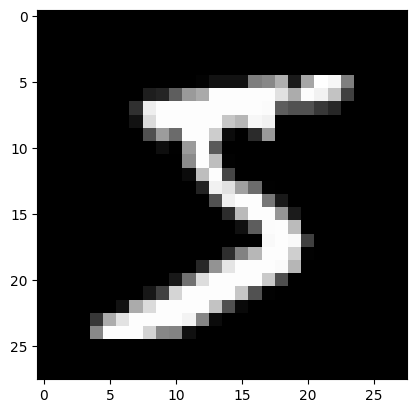

In [90]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap='gray')

In [91]:
train_set.transform = trans
valid_set.transform = trans

In [92]:
batch_size = 64

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

In [93]:
input_size = 1 * 28 * 28
n_classes = 10

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512,512),
    nn.ReLU(),
    nn.Linear(512,n_classes)
]

In [94]:
model = nn.Sequential(*layers)

In [95]:
model.to(device)
model.compile()

In [96]:
loss_function = nn.CrossEntropyLoss()

optimizer = Adam(model.parameters())

In [97]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

In [98]:
def get_batch_accuracy(output: Tensor, y: Tensor, N):
    pred = output.argmax(dim=1,keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

In [99]:
def train():
    loss = 0 
    accuracy = 0

    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        output = model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output,y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output,y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [100]:
def validate():
    loss =0
    accuracy = 0 

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            
            loss += loss_function(output,y).item()
            accuracy += get_batch_accuracy(output,y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [101]:
epochs = 5

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    train()
    validate()

Epoch: 0
Train - Loss: 212.9271 Accuracy: 0.9327
Valid - Loss: 16.0306 Accuracy: 0.9692
Epoch: 1
Train - Loss: 80.7524 Accuracy: 0.9729
Valid - Loss: 14.0050 Accuracy: 0.9718
Epoch: 2
Train - Loss: 54.6960 Accuracy: 0.9815
Valid - Loss: 11.5339 Accuracy: 0.9779
Epoch: 3
Train - Loss: 39.3687 Accuracy: 0.9870
Valid - Loss: 11.8714 Accuracy: 0.9781
Epoch: 4
Train - Loss: 32.0964 Accuracy: 0.9892
Valid - Loss: 12.0304 Accuracy: 0.9780


In [155]:
from PIL import Image

x_img = Image.open("mnist_digit.png")

x_img_tensor = trans(x_img)

# x_img_tensor

pred = model(x_img_tensor)
pred.argmax(dim=1, keepdim=True).item()

5

In [138]:

list(zip(range(10),pred.softmax(dim=1).tolist()[0]))

[(0, 0.0005295084556564689),
 (1, 0.005680907052010298),
 (2, 0.7391465902328491),
 (3, 0.19038280844688416),
 (4, 5.841007350682048e-06),
 (5, 0.05390208587050438),
 (6, 0.00018154733697883785),
 (7, 0.0005547094624489546),
 (8, 0.009110135957598686),
 (9, 0.0005059876129962504)]

In [156]:
torch.save(model,"model.pth")

In [20]:
model = torch.load("modelo.pth",weights_only=False)